# ACTIVIDAD RANDOM WALK


<img src='rw.jpg'>

Si $X$ es una variable aleatoria, un **random walk** generado a partir de la misma es la sucesión de sumas parciales de copias de la variable aleatoria:

$$S_n=\sum_{i=1}^n X_i$$

Trabajaremos con variables aleatorias  generadas con `numpy.random` .

Recuerda establecer `numpy.random.seed(0)` para unificar resultados.

1. Define una función que genere un random walk con $n$ pasos combinando funciones que varían cada paso con funciones que varían cada 3 y 7 pasos. Debe sumar acumultivamente las variables.
    - **Diario:** `np.random.randn()`
    - **Cada 3 días:** `np.random.ranf()`
    - **Cada 7 días:** `np.random.randint(-2,2)`   
2. Genera un random walk con 10000 pasos.
3. Representa la secuencia generada `sec` con los comandos:
        import matplotlib.pyplot as plt
        %matplotlib inline
        plt.plot(sec)
        
2. Valor máximo y mínimo de los últimos 100 pasos y cuántos pasos antes del final se obtuvo.
3. Función que da  la media de los últimos 7 días a lo largo de la secuencia. Represéntala, ¿qué se observa?
4. Función que da la media de los últimos 4 días con saltos de 7 en 7. Represéntala.
4. Función que representa la variación acumulada en cada semana (valor absoluto de la diferencia entre un día y el siguiente sumados).
4. El return diario si fuera la bolsa. Esto es
$$r_n=\log \dfrac{x_n}{x_{n-1}}$$
5. Si las inversiones duran todas una semana, ¿qué 3 días habría sido más rentable invertir?

**EXTRA:** Si se sigue un patrón de inversión cada 5 y 20 días alternadamente, con pausas de 3 días entre inversiones y recuperaciones, ¿qué ganancia media se espera? Usa simulación del random walk con un valor muy alto de días para aproximar fielmente esta media.

# SOLUCIÓN:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def rw(n):
    np.random.seed(0)
    pasos_diarios=np.cumsum(np.random.randn(n))
    
    n7=n//7+1
    n3=n//3+1
    
    rn7=np.zeros((n7,7))
    rn7[:,0]=np.random.randint(-2,2,n7)
    rn7=np.cumsum(rn7.ravel()[:n])
    
    rn3=np.zeros((n3,3))
    rn3[:,0]=np.random.ranf(n3)
    rn3=np.cumsum(rn3.ravel()[:n])
    
    
    return pasos_diarios+rn7+rn3

In [6]:
def basic_rw(n, random_state=None):
    if random_state:
        np.random.seed(random_state)
    rw = np.cumsum(np.random.randn(n))
    
    return rw
basic_rw(20)

array([-2.55298982, -1.89937122, -1.03493502, -1.77710004,  0.49265458,
       -0.96171109, -0.91595258, -1.10313643,  0.42964279,  1.89900156,
        2.05394898,  2.4321115 ,  1.54432576, -0.43647071, -0.78438286,
       -0.62803389,  0.60225679,  1.80463664,  1.41730982,  1.11500707])

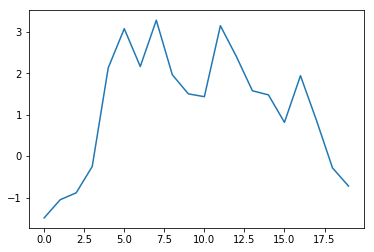

In [12]:
plt.plot(basic_rw(20));

In [2]:
sec=rw(1000)
sec

array([  0.46204617,   0.86220337,   1.84094136,   4.62365696,
         6.49121495,   5.51393707,   7.00636593,   6.85500873,
         6.75178987,   7.82960163,   7.9736452 ,   9.4279187 ,
        10.71134655,  10.83302157,  12.2768848 ,  12.67268993,
        14.166769  ,  13.96161074,  15.08593734,  14.2318416 ,
        11.67885179,  13.61892393,  14.48336013,  13.74119511,
        16.91260017,  15.45823449,  15.50399301,  15.95904286,
        17.49182208,  18.96118085,  19.879997  ,  20.25815952,
        19.37037377,  17.70208829,  17.35417614,  17.51052511,
        18.89691407,  20.09929391,  19.7119671 ,  20.06113141,
        19.01257844,  17.59256051,  17.22337138,  19.17414677,
        18.66449459,  18.65665577,  17.40386041,  18.18135076,
        17.41678925,  16.20404897,  15.30858241,  15.71781647,
        15.20701133,  14.02637915,  14.79250259,  15.22083446,
        14.28735169,  15.51411567,  14.87979358,  14.51705241,
        14.35084217,  13.99128901,  13.17814273,  10.59

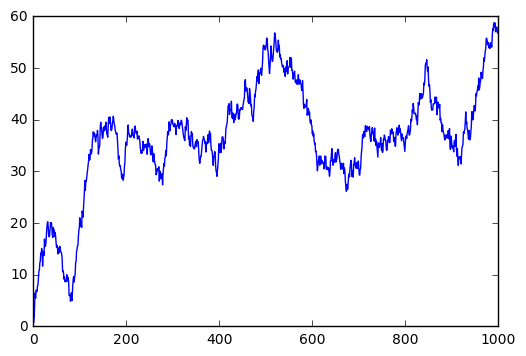

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sec);

In [4]:
np.max(sec[-100:]),np.min(sec[-100:])

(58.783876381841623, 31.142968554460495)

In [5]:
100-np.argmax(sec[-100:]),100-np.argmin(sec[-100:])

(9, 86)

In [6]:
def media7(x):
    n=len(x)
    l=[]
    for k in range(7,n):
        l+=[np.mean(x[(k-7):k])]
    return np.array(l)

media7(sec)        

array([  3.82862369,   4.74190405,   5.58327355,   6.43879645,
         6.9173662 ,   7.3368953 ,   8.07938237,   8.62604746,
         9.40060119,  10.24644405,  11.15175368,  12.00717733,
        12.8154657 ,  13.31839357,  13.43922646,  13.63094633,
        13.8896135 ,  13.82881723,  14.25038715,  14.30357246,
        14.48530837,  15.09676424,  15.65003541,  16.28972408,
        17.16669578,  17.64463283,  18.20350987,  18.51752348,
        18.71682823,  18.7195001 ,  18.71031913,  18.74164726,
        18.66361977,  18.76229943,  18.94951231,  18.98356722,
        18.94254526,  18.98214993,  18.7771786 ,  18.62641984,
        18.24680969,  18.12806288,  18.1029527 ,  17.95733522,
        17.40511174,  16.98415772,  16.49135137,  16.00885405,
        15.52473288,  15.21102505,  14.93721116,  14.96657305,
        14.84685549,  14.74828993,  14.7946418 ,  14.68018271,
        14.38836961,  13.86103925,  13.18380348,  12.53978789,
        11.7713119 ,  11.09269199,  10.33582276,   9.72

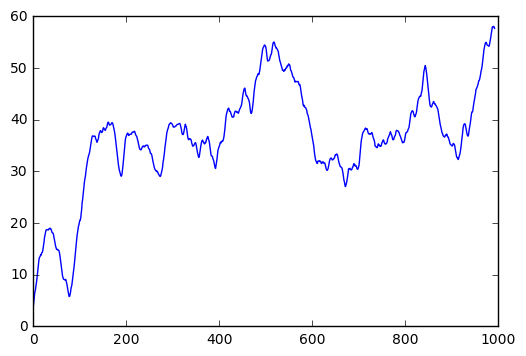

In [7]:
plt.plot(media7(sec) );

In [33]:
import pandas as pd

pd.rolling_mean(sec,7)

/home/infinitemonkeys/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


array([         nan,          nan,          nan,          nan,
                nan,          nan,   3.82862369,   4.74190405,
         5.58327355,   6.43879645,   6.9173662 ,   7.3368953 ,
         8.07938237,   8.62604746,   9.40060119,  10.24644405,
        11.15175368,  12.00717733,  12.8154657 ,  13.31839357,
        13.43922646,  13.63094633,  13.8896135 ,  13.82881723,
        14.25038715,  14.30357246,  14.48530837,  15.09676424,
        15.65003541,  16.28972408,  17.16669578,  17.64463283,
        18.20350987,  18.51752348,  18.71682823,  18.7195001 ,
        18.71031913,  18.74164726,  18.66361977,  18.76229943,
        18.94951231,  18.98356722,  18.94254526,  18.98214993,
        18.7771786 ,  18.62641984,  18.24680969,  18.12806288,
        18.1029527 ,  17.95733522,  17.40511174,  16.98415772,
        16.49135137,  16.00885405,  15.52473288,  15.21102505,
        14.93721116,  14.96657305,  14.84685549,  14.74828993,
        14.7946418 ,  14.68018271,  14.38836961,  13.86

In [99]:
def media7_f7(x):
    n=len(x)
    l=[]
    for k in range(28,n):
        l+=[np.mean(x[[k-28,k-21,k-14,k-7,k]])]
    return np.array(l)

media7_f7(sec)

array([ 10.14093714,  10.74624483,  11.49170082,  12.74593452,
        13.16673585,  12.7326413 ,  12.56629166,  13.55063293,
        14.35318697,  15.14337133,  15.76359654,  15.88071914,
        15.43236958,  14.68353057,  15.62430546,  16.83765835,
        17.31034992,  17.90019866,  17.47590748,  16.92637042,
        16.00028411,  16.40973829,  17.36483684,  17.62055941,
        18.14927878,  17.26399584,  17.03850262,  16.70868064,
        16.54342384,  17.57098795,  17.84827911,  17.67016922,
        17.04251738,  16.73596182,  16.15250062,  15.16426726,
        15.93344485,  15.94661659,  15.44608142,  15.08854318,
        14.93418504,  14.46049032,  13.38680529,  13.90450166,
        13.92962653,  13.25959157,  12.91268879,  13.02386183,
        12.66001127,  11.14439412,  11.27030916,  11.40859754,
        10.50710037,  10.644258  ,  10.69306545,  10.17487846,
         9.15367819,   9.83786438,  10.13006185,   9.40040475,
         9.55953829,   9.6660114 ,   9.15612075,   8.76

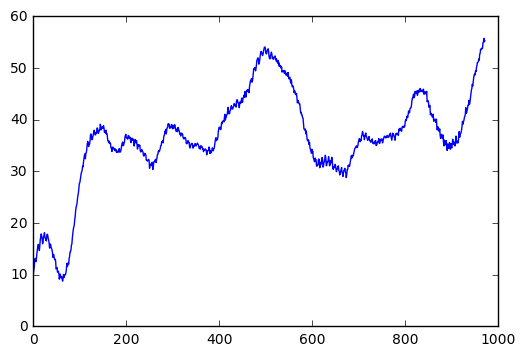

In [101]:
plt.plot(media7_f7(sec));

In [27]:
a=np.array([2,3,4,5])
a

array([2, 3, 4, 5])

In [31]:
np.concatenate((np.array([1]),a))[:-1]

array([1, 2, 3, 4])

In [32]:
retorno=np.log(sec/np.concatenate((np.array([1]),sec))[-1])
retorno

array([ -4.81177970e+00,  -4.18795333e+00,  -3.42941218e+00,
        -2.50850329e+00,  -2.16923952e+00,  -2.33241033e+00,
        -2.09287008e+00,  -2.11470965e+00,  -2.12988160e+00,
        -1.98177760e+00,  -1.96354748e+00,  -1.79601387e+00,
        -1.66838563e+00,  -1.65709021e+00,  -1.53197102e+00,
        -1.50023995e+00,  -1.38879022e+00,  -1.40337776e+00,
        -1.32592622e+00,  -1.38420741e+00,  -1.58190956e+00,
        -1.42822894e+00,  -1.36668882e+00,  -1.41929097e+00,
        -1.21163032e+00,  -1.30154739e+00,  -1.29859163e+00,
        -1.26966361e+00,  -1.17795577e+00,  -1.09729546e+00,
        -1.04997518e+00,  -1.03113158e+00,  -1.07594446e+00,
        -1.16600662e+00,  -1.18585605e+00,  -1.17688710e+00,
        -1.10069060e+00,  -1.03900455e+00,  -1.05846331e+00,
        -1.04090505e+00,  -1.09458845e+00,  -1.17221312e+00,
        -1.19342197e+00,  -1.08612638e+00,  -1.11306620e+00,
        -1.11348627e+00,  -1.18299719e+00,  -1.13929285e+00,
        -1.18225459e+00,

In [34]:
#las inversiones semanales más rentables:
pd.rolling_sum(sec,7)

/home/infinitemonkeys/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  from ipykernel import kernelapp as app


array([          nan,           nan,           nan,           nan,
                 nan,           nan,   26.8003658 ,   33.19332836,
         39.08291486,   45.07157513,   48.42156337,   51.35826713,
         56.55567661,   60.38233224,   65.80420831,   71.72510837,
         78.06227575,   84.05024129,   89.70825993,   93.22875499,
         94.07458521,   95.41662434,   97.22729453,   96.80172063,
         99.75271006,  100.12500721,  101.39715861,  105.67734969,
        109.55024784,  114.02806856,  120.16687045,  123.5124298 ,
        127.42456908,  129.62266436,  131.01779763,  131.03650067,
        130.97223389,  131.1915308 ,  130.64533839,  131.33609602,
        132.64658618,  132.88497054,  132.59781681,  132.87504951,
        131.44025019,  130.38493886,  127.72766786,  126.89644018,
        126.72066892,  125.70134652,  121.83578215,  118.88910403,
        115.43945959,  112.06197833,  108.67313016,  106.47717538,
        104.56047809,  104.76601136,  103.92798846,  103.23802

In [37]:
 np.argsort(retorno)[::-1][:3]

array([991, 993, 990])

In [38]:
np.sort(retorno)[::-1][:3]

array([ 0.03417837,  0.03357384,  0.03113221])

In [40]:
#la ganancia en %
(np.exp(np.sort(retorno)[::-1][:3])-1)*100

array([ 3.47691668,  3.4143804 ,  3.16218863])